In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
os.chdir(r'C:\Users\Helio\Documents\ALL THAT MATTERS\IC\csv')

In [18]:
data = pd.read_csv(r'TitlesLabelednoComma.csv', encoding="utf-8", sep=';')

In [19]:
data

,Title,URL,Label
0,A economia chilena: forte mas desigual,https://brasil.elpais.com/brasil/2013/11/17/in...,0.0
1,Uma líder discreta,https://brasil.elpais.com/brasil/2013/11/16/in...,0.0
2,China lança as maiores reformas econômicas e s...,https://brasil.elpais.com/brasil/2013/11/19/in...,0.0
3,Juízes argentinos pedem medidas do governo par...,https://brasil.elpais.com/brasil/2013/11/19/in...,0.0
4,Obama cede à pressão e anuncia mudanças na ref...,https://brasil.elpais.com/brasil/2013/11/19/in...,0.0
5,Adeus a 2013 sem a reforma da imigração nos Es...,https://brasil.elpais.com/brasil/2013/11/19/in...,0.0
6,O fim da esperança em Gaza,https://brasil.elpais.com/brasil/2013/11/20/in...,0.0
7,Oito países realizam o maior exercício militar...,https://brasil.elpais.com/brasil/2013/11/05/in...,0.0
8,“É por Mandela que agora somos livres”,https://brasil.elpais.com/brasil/2013/06/05/in...,0.0
9,“Só consideram provocação quando desenhamos Ma...,https://brasil.elpais.com/brasil/2012/09/19/in...,0.0


In [20]:
#eliminate last row that contains NaN Values
data = data.iloc[0:37355,:]

In [23]:
data = data.dropna(subset = ['Title', 'URL'])

In [25]:
from sklearn import preprocessing

In [27]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data.Label.values)
x = data.Title.values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y,
                                                random_state = 42,
                                                test_size = 0.2,
                                                stratify = y) 

In [35]:
import collections

In [37]:
collections.Counter(Ytrain)

Counter({0: 25694, 1: 4133})

In [38]:
collections.Counter(Ytest)

Counter({0: 6424, 1: 1033})

In [39]:
Xtrain.shape, Xtest.shape

((29827,), (7457,))

## TF-IDF APPROACH

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [47]:
pt_stopwords = set(nltk.corpus.stopwords.words('portuguese'))

In [48]:
tfidf = TfidfVectorizer(min_df = 3, strip_accents = 'unicode',
                        analyzer = 'word', token_pattern = '\w{1,}',
                        ngram_range = (1,3), sublinear_tf = 1, stop_words = pt_stopwords)

In [49]:
tfidf.fit(Xtrain), tfidf.fit(Xtest)

(TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=3,
         ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words={'estivéssemos', 'estiverem', 'fora', 'tuas', 'estávamos', 'esteja', 'fui', 'até', 'as', 'serei', 'um', 'nossos', 'nossas', 'tinham', 'pelas', 'fomos', 'tenho', 'fôramos', 'houvéramos', 'mais', 'teríamos', 'sua', 'estiver', 'estavam', 'ou', 'essas', 'este', 'estão', 'tive', 'lhes', 'tivem...u', 'houvera', 'quando', 'esse', 'tua', 'houvemos', 'elas', 'houverem', 'seremos', 'a', 'estiveram'},
         strip_accents='unicode', sublinear_tf=1, token_pattern='\\w{1,}',
         tokenizer=None, use_idf=True, vocabulary=None),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True,

In [50]:
Xtrain_tfidf = tfidf.transform(Xtrain)
Xtest_tfidf = tfidf.transform(Xtest)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
classif = LogisticRegression()
classif.fit(Xtrain_tfidf, Ytrain)
pred = classif.predict_proba(Xtest_tfidf)

In [53]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [54]:
loss1 = multiclass_logloss(Ytest, pred)
print('Log loss: {}'.format(loss1))

Log loss: 0.14828358506107256


In [58]:
y_pred = classif.predict(Xtest_tfidf)

In [92]:
y_pred = classif.predict(Xtest_tfidf)
confmat = confusion_matrix(y_true=Ytest, y_pred=y_pred)
print(confmat)

[[6408   16]
 [ 371  662]]


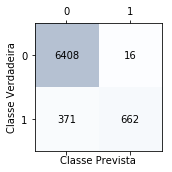

In [93]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')

plt.tight_layout()
plt.show()

In [61]:
classif.score(Xtest_tfidf, Ytest)

0.9481024540700014

In [317]:
print('Precision: %.3f' % precision_score(y_true=Ytest, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Ytest, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Ytest, y_pred=y_pred))

Precision: 0.976
Recall: 0.641
F1: 0.774


In [318]:
print(classification_report(Ytest, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      6424
          1       0.98      0.64      0.77      1033

avg / total       0.95      0.95      0.94      7457



In [116]:
y_proba = classif.predict_proba(Xtest_tfidf)

In [117]:
y_proba = y_proba[:,0]

In [118]:
y_proba

array([0.96876477, 0.99319261, 0.95287178, ..., 0.9574706 , 0.98373487,
       0.92727258])

In [124]:
1 - y_pred.mean()

0.9090787179831031

In [130]:
sum(y_proba > 0.5)/len(y_proba)

0.9090787179831031

In [77]:
Ytest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Logistic Regression with cutoff point $\neq$ 0.5

In [279]:
#define new cutoff 
cutoff = 0.31

y_proba = classif.predict_proba(Xtest_tfidf)
p0 = y_proba[:,0]
p1 = 1 - p0
estim = p1 > cutoff

index0 = (estim == 0).nonzero()
true0 = Ytest[index0]
estim0 = estim[index0]

FN = true0.sum()

index1 = ((1 - estim) == 0).nonzero()
true1 = Ytest[index1]
estim1 = estim[index1]

FP = len(true1) - true1.sum()

TP = true1.sum()
TN = len(true0) - true0.sum()

accuracy = (TP+TN)/(TP+TN+FN+FP)

np.array([[TP,FN],[FP,TN]])

array([[ 806,  227],
       [  60, 6364]], dtype=int64)

In [285]:
accuracy

0.9615126726565643

In [330]:
def accuracy_logreg(cutoff, model, x, output=1):
    y_proba = model.predict_proba(x)
    p0 = y_proba[:,0]
    p1 = 1 - p0
    estim = p1 > cutoff
    index0 = (estim == 0).nonzero()
    true0 = Ytest[index0]
    estim0 = estim[index0]
    FN = true0.sum()
    index1 = ((1 - estim) == 0).nonzero()
    true1 = Ytest[index1]
    estim1 = estim[index1]
    FP = len(true1) - true1.sum()
    TP = true1.sum()
    TN = len(true0) - true0.sum()
    
    if output == 0:
        return (np.array([[TP,FN],[FP,TN]]))
    else:
        return ((TP+TN)/(TP+TN+FN+FP))

In [284]:
accuracy_logreg(0.31)

0.9615126726565643

In [286]:
possible_cutoffs = np.linspace(0,0.99,1000)

In [331]:
accuracies = map(lambda x : accuracy_logreg(x, classif, Xtest_tfidf), possible_cutoffs)

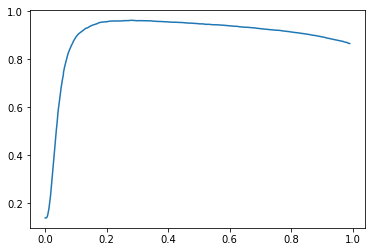

In [332]:
plt.plot(possible_cutoffs, list(accuracies))

In [309]:
acc = np.array((list(accuracies)))

In [342]:
best_cutoff, best_accuracy = (possible_cutoffs[acc.argmax()], acc.max())

In [343]:
best_accuracy

0.9765321174735149

In [344]:
best_cutoff

0.28342342342342347

## Count Vectorizer

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
cvt = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = pt_stopwords)

In [82]:
cvt.fit(Xtrain)
cvt.fit(Xtest)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None,
        stop_words={'estivéssemos', 'estiverem', 'fora', 'tuas', 'estávamos', 'esteja', 'fui', 'até', 'as', 'serei', 'um', 'nossos', 'nossas', 'tinham', 'pelas', 'fomos', 'tenho', 'fôramos', 'houvéramos', 'mais', 'teríamos', 'sua', 'estiver', 'estavam', 'ou', 'essas', 'este', 'estão', 'tive', 'lhes', 'tivem...u', 'houvera', 'quando', 'esse', 'tua', 'houvemos', 'elas', 'houverem', 'seremos', 'a', 'estiveram'},
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [83]:
Xtrain_cvt = cvt.transform(Xtrain)
Xtest_cvt = cvt.transform(Xtest)

In [84]:
classif2 = LogisticRegression()
classif2.fit(Xtrain_cvt, Ytrain)
pred2 = classif2.predict_proba(Xtest_cvt)

In [85]:
loss2 = multiclass_logloss(Ytest, pred2)
print('Log loss: {}'.format(loss2))
print('Log loss improvement: {}'.format(loss1 - loss2))

Log loss: 0.0892299355213839
Log loss improvement: 0.059053649539688655


In [94]:
y_pred_cvt = classif2.predict(Xtest_cvt)
confmat = confusion_matrix(y_true=Ytest, y_pred=y_pred_cvt)
print(confmat)

[[6405   19]
 [ 197  836]]


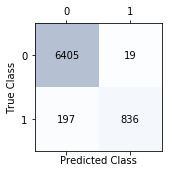

In [95]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

In [96]:
classif2.score(Xtest_cvt, Ytest)

0.971033927853024

In [315]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Ytest, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Ytest, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Ytest, y_pred=y_pred))

Precision: 0.976
Recall: 0.641
F1: 0.774


In [316]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      6424
          1       0.98      0.64      0.77      1033

avg / total       0.95      0.95      0.94      7457



In [ ]:
#OPTIMIZE CUTOFF PARAMETER

In [327]:
possible_cutoffs = np.linspace(0,0.99,1000)

In [337]:
accuracies = map(lambda x : accuracy_logreg(x, classif2, Xtest_cvt), possible_cutoffs)

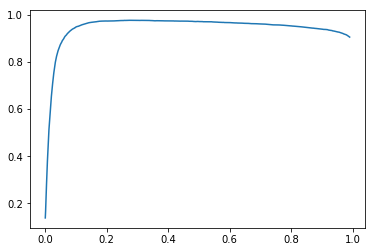

In [334]:
plt.plot(possible_cutoffs, list(accuracies))

In [338]:
acc = np.array((list(accuracies)))

In [340]:
best_cutoff, best_accuracy = (possible_cutoffs[acc.argmax()], acc.max())

In [341]:
best_accuracy

0.9765321174735149

In [345]:
best_cutoff

0.28342342342342347

## SVM

In [97]:
#first reduce dimensionality of tfidf using singular value decomposition
from sklearn import decomposition

In [98]:
svd = decomposition.TruncatedSVD(n_components = 120)
svd.fit(Xtrain_tfidf)
Xtrain_svd = svd.transform(Xtrain_tfidf)
Xtest_svd = svd.transform(Xtest_tfidf)

In [99]:
# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
from sklearn import preprocessing

In [100]:
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain_svd)
Xtrain_svd_scaled = scaler.transform(Xtrain_svd)
Xtest_svd_scaled = scaler.transform(Xtest_svd)

In [101]:
#Apply SVM
from sklearn.svm import SVC

In [102]:
classif3 = SVC(probability=True)
classif3.fit(Xtrain_svd_scaled, Ytrain)
pred3 = classif3.predict_proba(Xtest_svd_scaled)

In [103]:
loss3 = multiclass_logloss(Ytest, pred3)
print('Log loss: {}'.format(loss3))
print('Log loss improvement: {}'.format(loss2 - loss3))

Log loss: 0.19739955092319592
Log loss improvement: -0.10816961540181201
